<a href="https://colab.research.google.com/github/Ramchand-Bethireddy/solutions/blob/main/Project_college.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# required libraries
import numpy as np                                         #
import pandas as pd                                        #To load the Dataframe

import matplotlib.pyplot as plt                            #To visualize the data features like barplot,scatterplot
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns                                      #To see the correlation between features using heatmap

import nltk                                                #Natural language toolkit
from nltk.corpus import stopwords                          #waste words (It will collect)
from nltk.tokenize import word_tokenize                    #It is used to split a string into tokens or words.
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import re
import string


import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download("stopwords")                                 #Initialising them
nltk.download('punkt')
nltk.download('all')


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_gramma

In [2]:
#Reading the contents of file using pandas
df = pd.read_csv('/content/drive/MyDrive/project_college/7817_1.csv')
#Just checking head part of file to confirm it
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [3]:
#Gathering information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [4]:
data = df[["reviews.text","reviews.rating"]]
data.head()


,reviews.text,reviews.rating
0,I initially had trouble deciding between the p...,5.0
1,Allow me to preface this with a little history...,5.0
2,I am enjoying it so far. Great for reading. Ha...,4.0
3,I bought one of the first Paperwhites and have...,5.0
4,I have to say upfront - I don't like coroporat...,5.0


In [5]:
# drop missing values if not cleaned properly
data.dropna(inplace=True)
data.isnull().sum()


reviews.text      0
reviews.rating    0
dtype: int64

In [6]:
# descriptive statistics
data.describe()


,reviews.rating
count,1177.000000
mean,4.359388
std,1.021445
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    741
4.0    236
3.0    124
2.0     34
1.0     42
Name: reviews.rating, dtype: int64

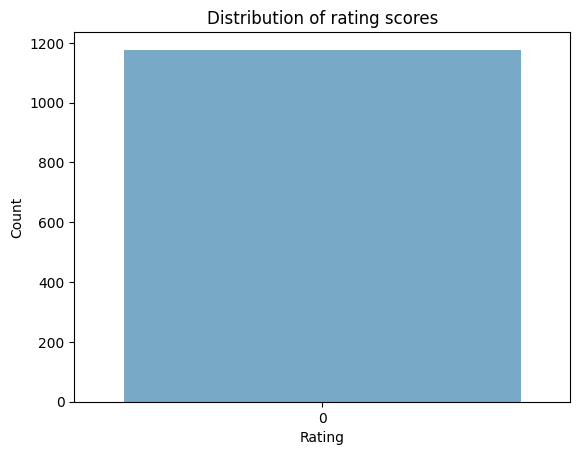

In [8]:
#distribution of rating
sns.countplot(data['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [9]:

# load the other data/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv
data2 = pd.read_csv("/content/drive/MyDrive/project_college/7817_1.csv")
data2 = data2[['reviews.text', 'reviews.rating']]
# use only data of rating lower than or equal to 3
data2 = data2[data2["reviews.rating"] <= 3].reset_index(drop=True) # reset index after filtering rows

data3 = pd.read_csv("/content/drive/MyDrive/project_college/7817_1.csv")
data3 = data3[['reviews.text', 'reviews.rating']]
# use only data of rating lower than or equal to 3
data3 = data3[data3["reviews.rating"] <= 3].reset_index(drop=True) # reset index after filtering rows

In [10]:

# distribution of rating
data2['reviews.rating'].value_counts().sort_index(ascending=False)


3.0    124
2.0     34
1.0     42
Name: reviews.rating, dtype: int64

In [11]:

# distribution of rating
data3['reviews.rating'].value_counts().sort_index(ascending=False)


3.0    124
2.0     34
1.0     42
Name: reviews.rating, dtype: int64

In [12]:
# concatenation
data = pd.concat([data, data2, data3])

# assert data.shape[0] == data.shape[0] + data2.shape[0] + data3.shape[0]
data.head()


,reviews.text,reviews.rating
0,I initially had trouble deciding between the p...,5.0
1,Allow me to preface this with a little history...,5.0
2,I am enjoying it so far. Great for reading. Ha...,4.0
3,I bought one of the first Paperwhites and have...,5.0
4,I have to say upfront - I don't like coroporat...,5.0


In [13]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5.0    741
4.0    236
3.0    372
2.0    102
1.0    126
Name: reviews.rating, dtype: int64

In [14]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE)
sentiment_score = {1: 0,2: 0,3: 0, 4: 1, 5: 1}

sentiment = {0: 'NEGATIVE',1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()



,reviews.text,reviews.rating,sentiment_score,sentiment
0,I initially had trouble deciding between the p...,5.0,1,POSITIVE
1,Allow me to preface this with a little history...,5.0,1,POSITIVE
2,I am enjoying it so far. Great for reading. Ha...,4.0,1,POSITIVE
3,I bought one of the first Paperwhites and have...,5.0,1,POSITIVE
4,I have to say upfront - I don't like coroporat...,5.0,1,POSITIVE


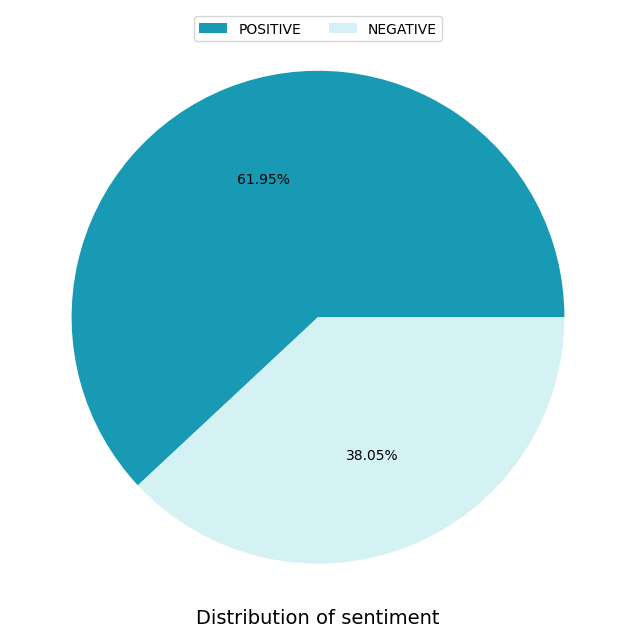

In [15]:
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [16]:

data['sentiment_score'].value_counts()

1    977
0    600
Name: sentiment_score, dtype: int64

In [17]:
# export cleaned data to csv
data.to_csv('d_data.csv', index=False)
data

,reviews.text,reviews.rating,sentiment_score,sentiment
0,I initially had trouble deciding between the p...,5.0,1,POSITIVE
1,Allow me to preface this with a little history...,5.0,1,POSITIVE
2,I am enjoying it so far. Great for reading. Ha...,4.0,1,POSITIVE
3,I bought one of the first Paperwhites and have...,5.0,1,POSITIVE
4,I have to say upfront - I don't like coroporat...,5.0,1,POSITIVE
...,...,...,...,...
195,This is not the same remote that I got for my ...,3.0,0,NEGATIVE
196,I have had to change the batteries in this rem...,1.0,0,NEGATIVE
197,"Remote did not activate, nor did it connect to...",1.0,0,NEGATIVE
198,It does the job but is super over priced. I fe...,3.0,0,NEGATIVE


In [18]:

data = pd.read_csv("d_data.csv")
data['sentiment_score'].value_counts()


1    977
0    600
Name: sentiment_score, dtype: int64

In [19]:
# get all used words
all_words = pd.Series(' '.join(data['reviews.text']).split())





In [20]:
# get words used positive reivews
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())
positiveWords


0                 I
1         initially
2               had
3           trouble
4          deciding
            ...    
127952         with
127953          the
127954      pairing
127955      process
127956      CHEERS!
Length: 127957, dtype: object

In [21]:
def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)
        output: cleaned text (str)
    """
    text = str(text)

    text = text.lower()
    text = text.strip()

    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    text = text.strip()

    return text

In [22]:
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)
        output: cleaned text (str)
    """
    text = str(text)
    filtered_sentence = []

    # Stop word lists can be adjusted for our problem
    stopwords = ["a", "an", "the", "this", "that", "is", "it", "to", "and","I","we","am"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stopwords:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)

    return text

In [23]:
# test
text = "   This is a message to be cleaned. It may involve some things like: , ?, :, ''  26 adjacent spaces and tabs     .  "
print(text, '\n')
text = clean_text(text)
remove_stopwords(text)

   This is a message to be cleaned. It may involve some things like: , ?, :, ''  26 adjacent spaces and tabs     .   



'message be cleaned may involve some things like adjacent spaces tabs'

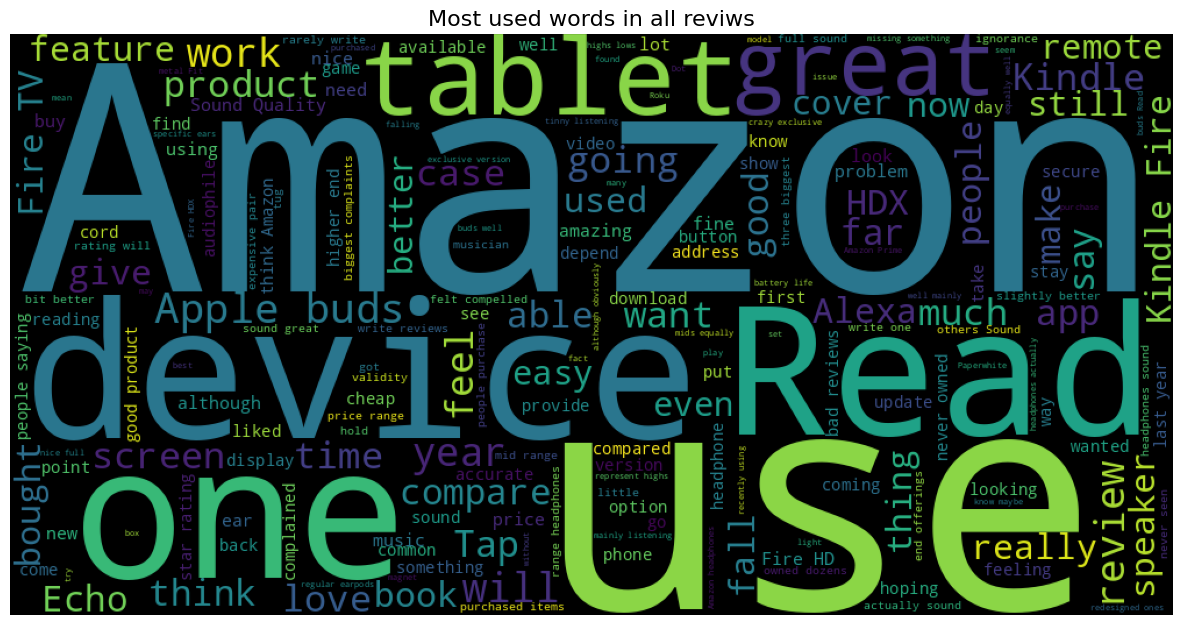

In [24]:
'''Many times you might have seen a cloud filled with lots of words in different
 sizes, which represent the frequency or the importance of each word. This is
 called Tag Cloud or WordCloud'''
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

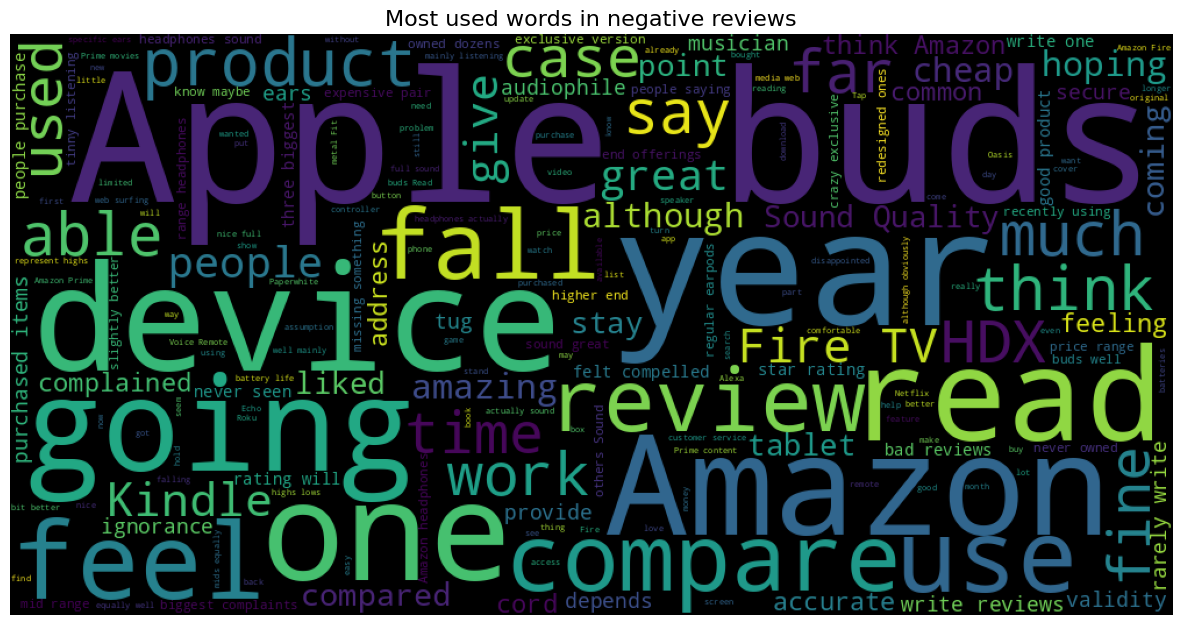

In [25]:
# get words used negative reivews
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())


# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()
